# Importing Dependencies

In [4]:
pip install xgboost

In [5]:
# Importing libraries
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import AdaBoostClassifier

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 85% 56.0M/66.0M [00:00<00:00, 191MB/s]
100% 66.0M/66.0M [00:00<00:00, 183MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


# Exploratory data analysis

In [7]:
# Loading the data
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
# Checking the shape
df.shape

(284807, 31)

In [9]:
# checking the datatypes and null/non-null distribution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
# checking distribution of numerical values in the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
# Checking the class distribution of the target variable
df['Class'].value_counts()

,count
Class,
0,284315
1,492


Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<Axes: ylabel='Class'>

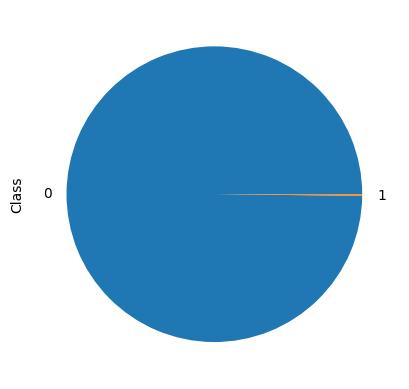

In [12]:
# Checking the class distribution of the target variable in percentage
print((df.groupby('Class')['Class'].count()/df['Class'].count())*100)
((df.groupby('Class')['Class'].count()/df['Class'].count())*100).plot.pie()

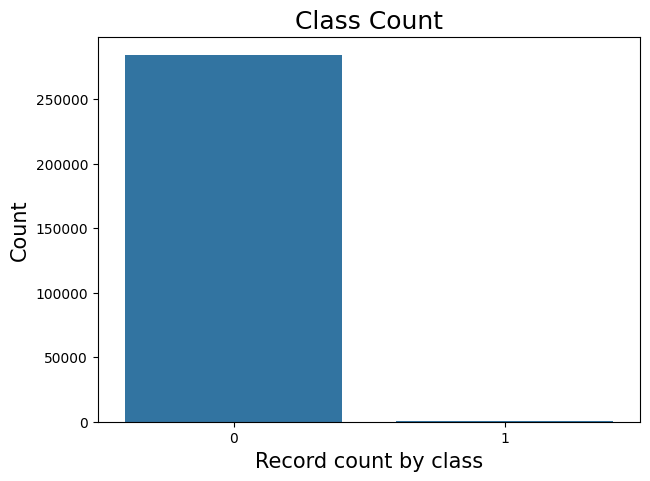

In [13]:
# create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(7,5))
sns.countplot(df, x='Class')
plt.title('Class Count', fontsize=18)
plt.xlabel('Record count by class', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()


In [14]:
# checking the correlation
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


<Axes: >

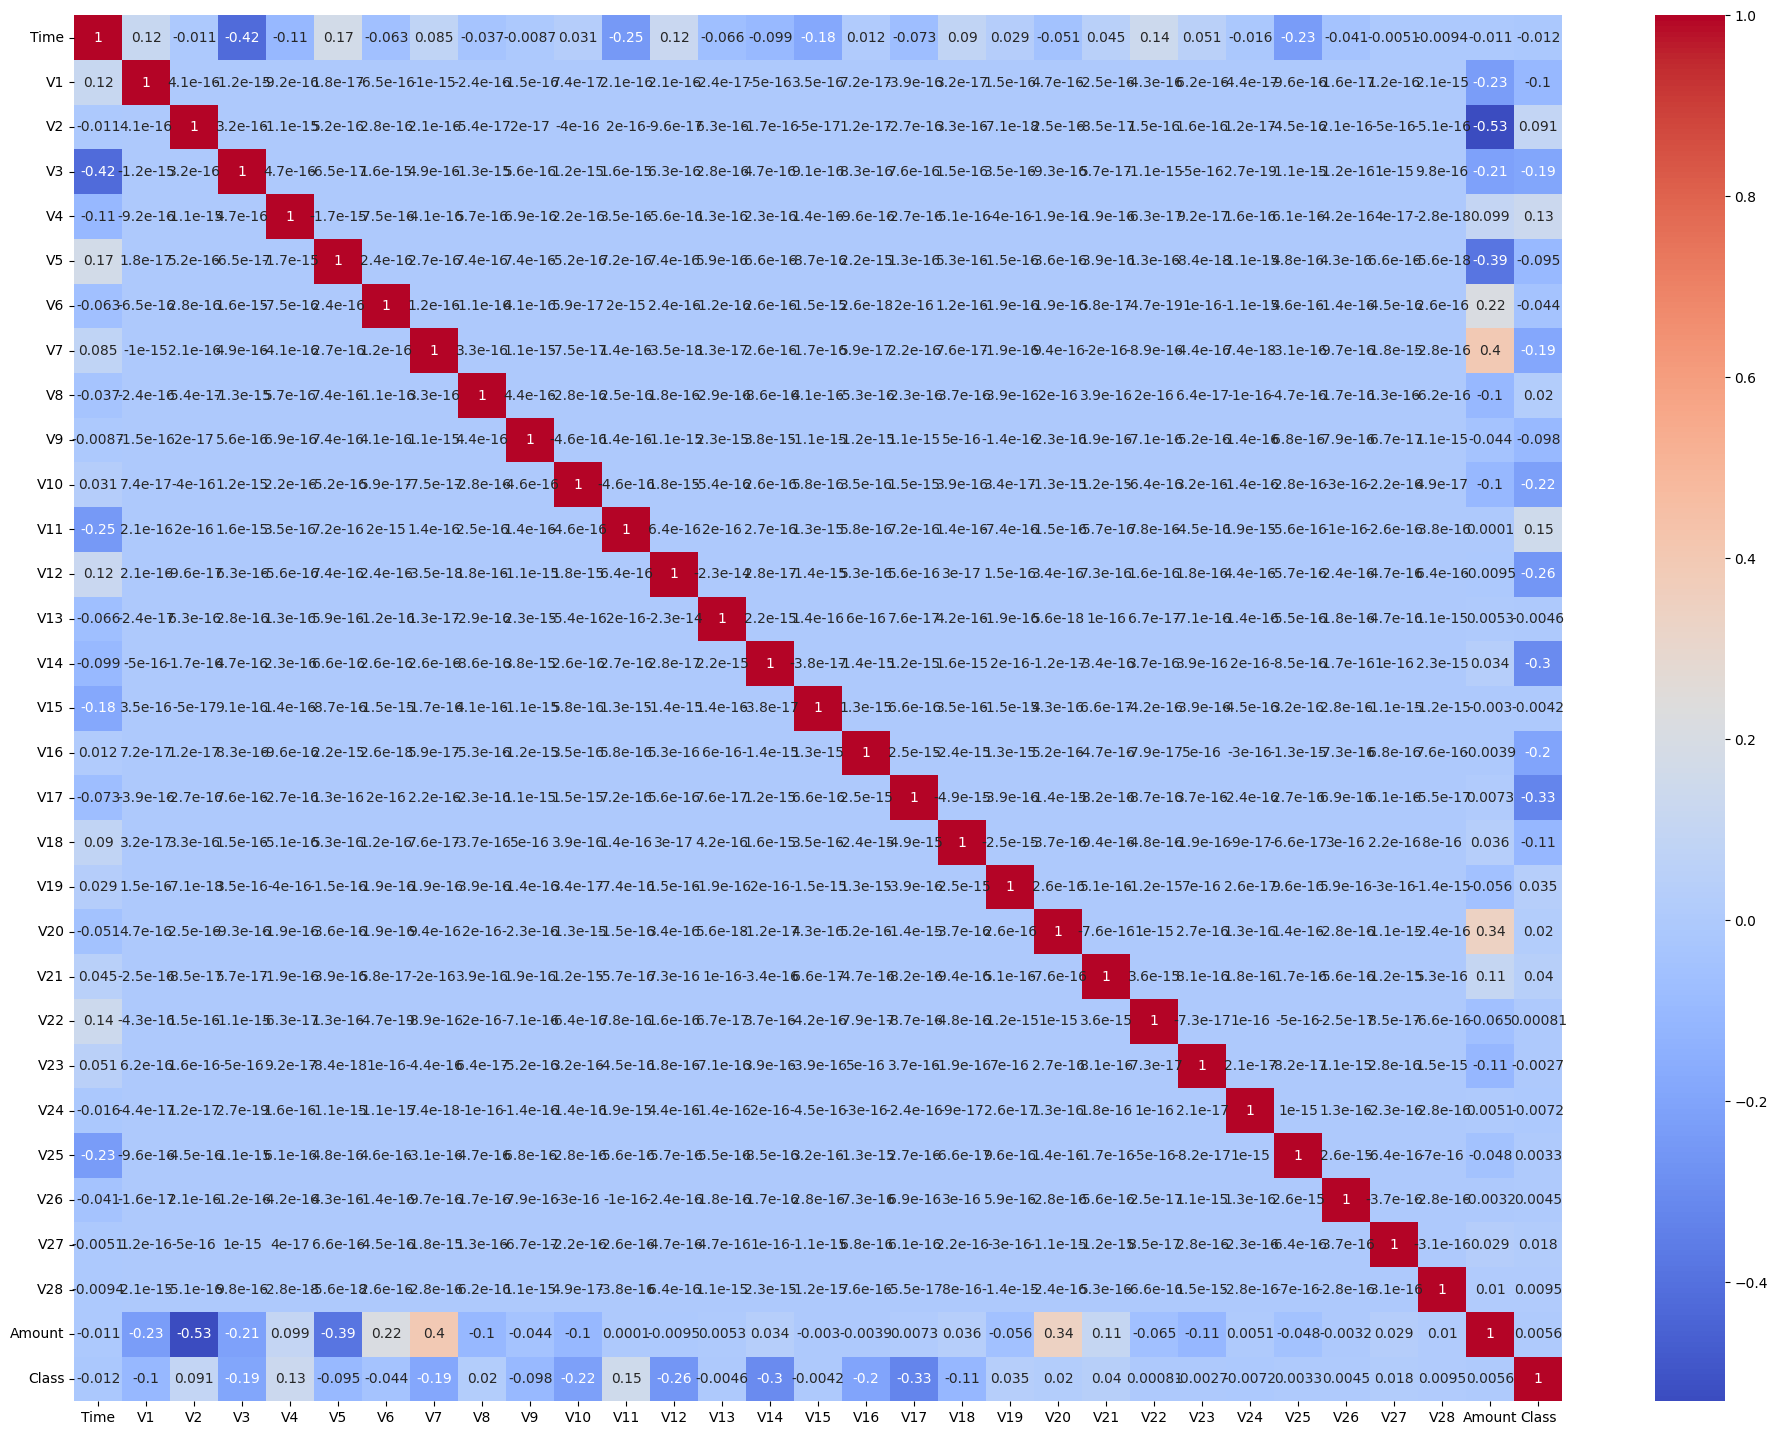

In [15]:
plt.figure(figsize=(24,18))
sns.heatmap(corr, cmap='coolwarm', annot=True)

Feature engineering

In [16]:
# As time is given in relative fashion, we are using pandas.Timedelta which represents a duration, the difference between two time or dates
Delta_Time = pd.to_timedelta(df['Time'], unit='s')

#Create derived columns Mins and Hours
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

In [17]:
# Drop unecessary columns
# we will drop Time as we derived the Day/Hour/Minutes from the time column
df.drop('Time', axis=1, inplace=True)
# we will keep only derived column hour, as day/minutes might not be useful
df.drop(['Time_Day','Time_Min'],axis=1, inplace=True)

Splitting the data into train & test data

In [18]:
# Plitting the dataset into X and y
y = df['Class']
X = df.drop(['Class'],axis=1)

In [19]:
# checking some rows of X
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
# checking some rows of y
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [21]:
# splitting dataset into train test split
X_train, X_test ,y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.2)

In [22]:
# checking the spread of data after split
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


# Model Building

In [23]:
# create a dataframe to store results
df_Results = pd.DataFrame(columns=['Methodology','Model','Accuracy','roc_value','threshold'])

In [24]:
# created a common function to plot confusion matrix
def Plot_confusion_matrix(y_test,pred_test):
  cm = confusion_matrix(y_test,pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest',cmap=plt.cm.Accent)
  categoryNames = ['Non-Fraudelent','Fraudelent']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted Label')
  ticks = np.arange(len(categoryNames))
  plt.xticks(ticks, categoryNames, rotation=45)
  plt.yticks(ticks, categoryNames)
  s = [['TN','FP'],['FN','TP']]

  for i in range(2):
    for j in range(2):
      plt.text(j,i,str(s[i][j]) +" = " + str(cm[i][j]), fontsize=12)
  plt.show()

In [25]:
def buildAndRunLogisticModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    from sklearn import linear_model
    from sklearn.model_selection import KFold
    from sklearn import metrics
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt

    num_C = list(np.power(10.0, np.arange(-10, 10)))
    cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

    # L2 Regularization
    searchCV_l2 = linear_model.LogisticRegressionCV(
        Cs=num_C,
        penalty='l2',
        scoring='roc_auc',
        cv=cv_num,
        random_state=42,
        max_iter=10000,
        fit_intercept=True,
        solver='newton-cg',
        tol=10
    )

    # L1 Regularization
    searchCV_l1 = linear_model.LogisticRegressionCV(
        Cs=num_C,
        penalty='l1',
        scoring='roc_auc',
        cv=cv_num,
        random_state=42,
        max_iter=10000,
        fit_intercept=True,
        solver='liblinear',
        tol=10
    )

    # Fit models
    searchCV_l1.fit(X_train, y_train)
    searchCV_l2.fit(X_train, y_train)

    # Extracting best cross-validation score for L1 and L2 models
    print("Max AUC ROC for L1: ", searchCV_l1.scores_[1].mean(axis=0).max())
    print("Max AUC ROC for L2: ", searchCV_l2.scores_[1].mean(axis=0).max())

    # Get the coefficients and intercepts
    print("Parameters for L1 regularisation:")
    print(searchCV_l1.coef_)
    print(searchCV_l1.intercept_)

    print("Parameters for L2 regularisation:")
    print(searchCV_l2.coef_)
    print(searchCV_l2.intercept_)

    # Predictions
    y_pred_l1 = searchCV_l1.predict(X_test)
    y_pred_l2 = searchCV_l2.predict(X_test)

    # Predicted probabilities
    y_pred_prob_l1 = searchCV_l1.predict_proba(X_test)[:, 1]
    y_pred_prob_l2 = searchCV_l2.predict_proba(X_test)[:, 1]

    # Accuracy
    Accuracy_l1 = metrics.accuracy_score(y_test, y_pred_l1)
    Accuracy_l2 = metrics.accuracy_score(y_test, y_pred_l2)

    print("Accuracy of Logistic model with L1 regularisation: {0}".format(Accuracy_l1))
    print("Accuracy of Logistic model with L2 regularisation: {0}".format(Accuracy_l2))

    # ROC and AUC for L1 model
    l1_roc_value = metrics.roc_auc_score(y_test, y_pred_prob_l1)
    print("L1 ROC AUC Value: {0}".format(l1_roc_value))

    fpr_l1, tpr_l1, thresholds_l1 = metrics.roc_curve(y_test, y_pred_prob_l1)
    l1_threshold = thresholds_l1[np.argmax(tpr_l1 - fpr_l1)]
    print("L1 Threshold: {0}".format(l1_threshold))

    roc_auc_l1 = metrics.auc(fpr_l1, tpr_l1)
    print("ROC AUC for L1 regularisation: {:.1%}".format(roc_auc_l1))
    plt.plot(fpr_l1, tpr_l1, label="L1, AUC=" + str(roc_auc_l1))

    # ROC and AUC for L2 model
    l2_roc_value = metrics.roc_auc_score(y_test, y_pred_prob_l2)
    print("L2 ROC AUC Value: {0}".format(l2_roc_value))

    fpr_l2, tpr_l2, thresholds_l2 = metrics.roc_curve(y_test, y_pred_prob_l2)
    l2_threshold = thresholds_l2[np.argmax(tpr_l2 - fpr_l2)]
    print("L2 Threshold: {0}".format(l2_threshold))

    roc_auc_l2 = metrics.auc(fpr_l2, tpr_l2)
    print("ROC AUC for L2 regularisation: {:.1%}".format(roc_auc_l2))
    plt.plot(fpr_l2, tpr_l2, label="L2, AUC=" + str(roc_auc_l2))

    plt.legend(loc=4)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.show()

    new_row_l1 = pd.DataFrame({
    'Methodology': [Methodology],
    'Model': ['Logistic Regression with L1 Regularisation'],
    'Accuracy': [Accuracy_l1],
    'roc_value': [l1_roc_value],  # Change 'ROC AUC' to 'roc_value'
    'threshold': [l1_threshold]  # Change 'Threshold' to 'threshold'
})

    new_row_l2 = pd.DataFrame({
    'Methodology': [Methodology],
    'Model': ['Logistic Regression with L2 Regularisation'],
    'Accuracy': [Accuracy_l2],
    'roc_value': [l2_roc_value],  # Change 'ROC AUC' to 'roc_value'
    'threshold': [l2_threshold]  # Change 'Threshold' to 'threshold'
})


    # Concatenate results to the main DataFrame
    df_Results = pd.concat([df_Results, new_row_l1, new_row_l2], ignore_index=True)

    return df_Results


In [26]:
# Created a common function to fit and predict on a KNN model
def buildAndRunKNNModels(df_Results, Methodology, X_train, y_train, X_test, y_test):

  #create KNN model and fit the model with train dataset
  knn = KNeighborsClassifier(n_neighbors=5, n_jobs=16)
  knn.fit(X_train,y_train)
  score = knn.score(X_train,y_train)
  print("model score")
  print(score)

  # Accuracy
  y_pred = knn.predict(X_test)
  KNN_Accuracy = metrics.accuracy_score(y_test,y_pred)
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test,y_pred)
  print("Classification Report")
  print(classification_report(y_test, y_pred))

  knn_probs = knn.predict_proba(X_test)[:,1]

  # Calculate roc auc
  knn_roc_value = roc_auc_score(y_test,knn_probs)
  print("KNN roc_value_value:{0}". format(knn_roc_value))
  fpr,tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
  knn_threshold = thresholds[np.argmax(tpr-fpr)]
  print("KNN threshold: {0}" .format(knn_threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr, label="Test, auc ="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  # Append results using pd.concat
  new_row = pd.DataFrame({
  'Methodology': [Methodology],
  'Model': ['KNN'],
  'Accuracy': [KNN_Accuracy],
  'roc_value': [knn_roc_value],
  'threshold': [knn_threshold]
      })
  df_Results = pd.concat([df_Results, new_row], ignore_index=True)

  return df_Results

In [27]:
def buildAndRunTreeModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    from sklearn.tree import DecisionTreeClassifier
    from sklearn import metrics
    import matplotlib.pyplot as plt
    import pandas as pd

    # Evaluate Decision Tree model with 'gini' & 'entropy'
    criteria = ['gini', 'entropy']

    for c in criteria:
        dt = DecisionTreeClassifier(criterion=c, random_state=42)
        dt.fit(X_train, y_train)

        # Predicting
        y_pred = dt.predict(X_test)
        test_score = dt.score(X_test, y_test)

        # Predicted probabilities for ROC AUC
        tree_preds = dt.predict_proba(X_test)[:, 1]
        tree_roc_value = metrics.roc_auc_score(y_test, tree_preds)

        # Output results
        print(f"{c} criterion score: {test_score}")
        print("Confusion Matrix:")
        Plot_confusion_matrix(y_test, y_pred)
        print("Classification Report:")
        print(metrics.classification_report(y_test, y_pred))

        print(f"{c} criterion tree ROC value: {tree_roc_value}")

        # ROC curve
        fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
        tree_threshold = thresholds[np.argmax(tpr - fpr)]
        print(f"Tree threshold: {tree_threshold}")

        # Plotting ROC curve
        roc_auc = metrics.auc(fpr, tpr)
        print(f"ROC AUC for the test dataset: {roc_auc:.1%}")
        plt.plot(fpr, tpr, label=f"Test, AUC = {roc_auc}")
        plt.legend(loc=4)
        plt.show()

        # Append results using pd.concat
        new_row = pd.DataFrame({
            'Methodology': [Methodology],
            'Model': [f'Tree Model with {c} criterion'],
            'Accuracy': [test_score],
            'roc_value': [tree_roc_value],
            'threshold': [tree_threshold]
        })
        df_Results = pd.concat([df_Results, new_row], ignore_index=True)

    return df_Results


In [28]:
def buildAndRunRandomForestModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn import metrics
    import matplotlib.pyplot as plt
    import pandas as pd

    # Create the model with 100 trees
    RF_model = RandomForestClassifier(n_estimators=100, bootstrap=True, max_features='sqrt', random_state=42)

    # Fit on training data
    RF_model.fit(X_train, y_train)
    RF_test_score = RF_model.score(X_test, y_test)

    print('Model Accuracy: {0}'.format(RF_test_score))

    # Actual class predictions
    rf_predictions = RF_model.predict(X_test)

    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, rf_predictions)  # Make sure this function is imported/defined
    print("Classification Report")
    print(metrics.classification_report(y_test, rf_predictions))

    # Probabilities for each class
    rf_probs = RF_model.predict_proba(X_test)[:, 1]

    # Calculate ROC AUC
    roc_value = metrics.roc_auc_score(y_test, rf_probs)

    print("Random Forest ROC AUC Value: {0}".format(roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("Random Forest Threshold: {0}".format(threshold))

    # Plot ROC curve
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC AUC for the test dataset: {:.1%}".format(roc_auc))
    plt.plot(fpr, tpr, label="Test, AUC = " + str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    # Append results using pd.concat
    new_row = pd.DataFrame({
        'Methodology': [Methodology],
        'Model': ['Random Forest'],
        'Accuracy': [RF_test_score],
        'roc_value': [roc_value],
        'threshold': [threshold]
    })
    df_Results = pd.concat([df_Results, new_row], ignore_index=True)

    return df_Results


In [29]:
def buildAndRunXGBoostModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    from xgboost import XGBClassifier
    from sklearn import metrics
    import matplotlib.pyplot as plt
    import pandas as pd

    # Initialize and train XGBoost model
    XGBmodel = XGBClassifier(random_state=42)
    XGBmodel.fit(X_train, y_train)

    # Model predictions
    y_pred = XGBmodel.predict(X_test)
    XGB_test_score = XGBmodel.score(X_test, y_test)
    print('Model Accuracy: {0}'.format(XGB_test_score))

    # Confusion Matrix
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred)  # Ensure this function is defined or imported
    print("Classification Report")
    print(metrics.classification_report(y_test, y_pred))

    # Probabilities for each class
    XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

    # Calculate ROC AUC
    XGB_roc_value = metrics.roc_auc_score(y_test, XGB_probs)
    print("XGBoost ROC AUC Value: {0}".format(XGB_roc_value))

    # ROC curve and threshold
    fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("XGBoost Threshold: {0}".format(threshold))

    # Plot ROC curve
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset: {:.1%}".format(roc_auc))
    plt.plot(fpr, tpr, label="Test, AUC = " + str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    # Update results DataFrame using pd.concat
    new_row = pd.DataFrame({
        'Methodology': [Methodology],
        'Model': ['XGBoost'],
        'Accuracy': [XGB_test_score],
        'roc_value': [XGB_roc_value],
        'threshold': [threshold]
    })
    df_Results = pd.concat([df_Results, new_row], ignore_index=True)

    return df_Results


Perform Cross Validation with RepeatedKFold

In [30]:
# Lets perform RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
  print("Train:", train_index, "TEST:",test_index)
  X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
  y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

Train: [     0      2      3 ... 284803 284804 284806] TEST: [     1     16     21 ... 284788 284800 284805]
Train: [     1      4      5 ... 284804 284805 284806] TEST: [     0      2      3 ... 284787 284796 284801]
Train: [     0      1      2 ... 284803 284805 284806] TEST: [     4     11     19 ... 284798 284799 284804]
Train: [     0      1      2 ... 284804 284805 284806] TEST: [     7     10     12 ... 284793 284802 284803]
Train: [     0      1      2 ... 284803 284804 284805] TEST: [     5      6      9 ... 284790 284792 284806]
Train: [     0      1      2 ... 284804 284805 284806] TEST: [     3      7     19 ... 284793 284794 284797]
Train: [     1      2      3 ... 284804 284805 284806] TEST: [     0      4      6 ... 284795 284801 284802]
Train: [     0      3      4 ... 284803 284804 284805] TEST: [     1      2      5 ... 284799 284800 284806]
Train: [     0      1      2 ... 284802 284803 284806] TEST: [     8     10     16 ... 284798 284804 284805]
Train: [     0     

Logistic Regression with L1 and L2 Regularisation
Max AUC ROC for L1:  0.9698671049100126
Max AUC ROC for L2:  0.5766845717169611
Parameters for L1 regularisation:
[[-0.0557075  -0.12542225 -0.18081223  0.0632425  -0.26302579  0.09505387
   0.11863138 -0.02907151 -0.14378392 -0.14499012 -0.03525325  0.00700102
  -0.13749153 -0.22205842  0.01261729 -0.11416279 -0.22206528  0.0315652
   0.00940995  0.23268208  0.08921593 -0.02820025 -0.01198636 -0.00576858
  -0.02898028  0.00325937 -0.05575046 -0.00646764 -0.00652484 -0.11645507]]
[-2.10209751]
Parameters for L2 regularisation:
[[-1.35707301e-07  1.22946396e-07 -1.87384939e-07  1.00977640e-07
  -8.79971626e-08 -2.28793792e-08 -1.45526381e-07  2.49061891e-08
  -6.79663195e-08 -1.49122366e-07  1.04111760e-07 -1.75622433e-07
  -3.95263431e-09 -1.93597897e-07  7.65726438e-10 -9.96278514e-08
  -1.66266625e-07 -6.12118721e-08  2.20092774e-08  1.87332585e-09
   2.10713782e-08 -4.22338949e-09 -4.41290473e-09  5.43038718e-09
  -2.44290100e-09  1.

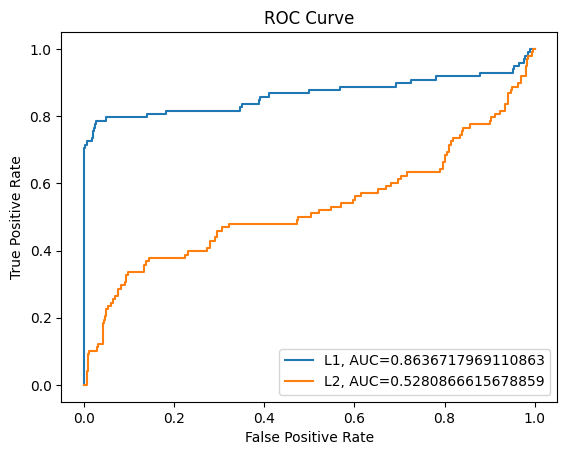

Time Taken by Model: -----99.07650256156921econds-----
------------------------------------------------------------
KNN Model
model score
0.9993284938072207
Confusion Matrix


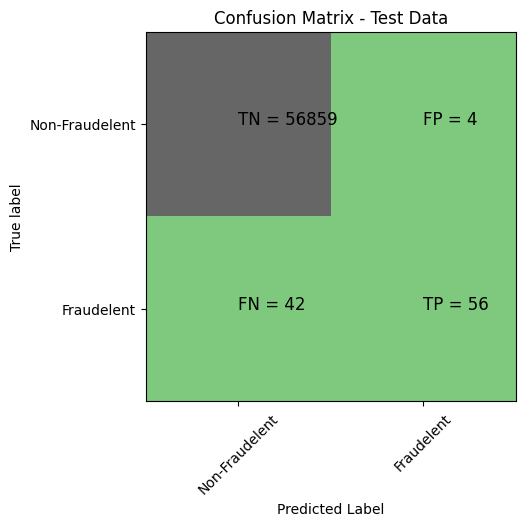

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.93      0.57      0.71        98

    accuracy                           1.00     56961
   macro avg       0.97      0.79      0.85     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value_value:0.8620291089898492
KNN threshold: 0.2
ROC for the test dataset 86.2%


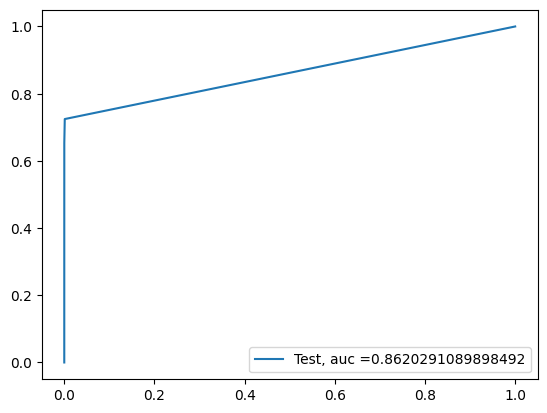

Time Taken by Model: -----23.231509685516357econds-----
------------------------------------------------------------
Decision Tree Models with 'gini' & 'entropy' criteria
gini criterion score: 0.9993153210091115
Confusion Matrix:


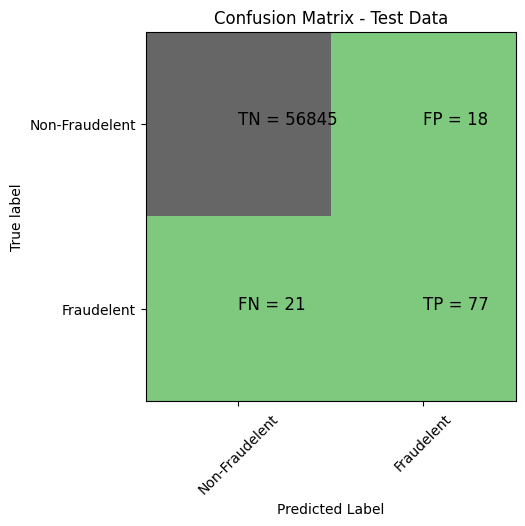

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.81      0.79      0.80        98

    accuracy                           1.00     56961
   macro avg       0.91      0.89      0.90     56961
weighted avg       1.00      1.00      1.00     56961

gini criterion tree ROC value: 0.8926988677045832
Tree threshold: 1.0
ROC AUC for the test dataset: 89.3%


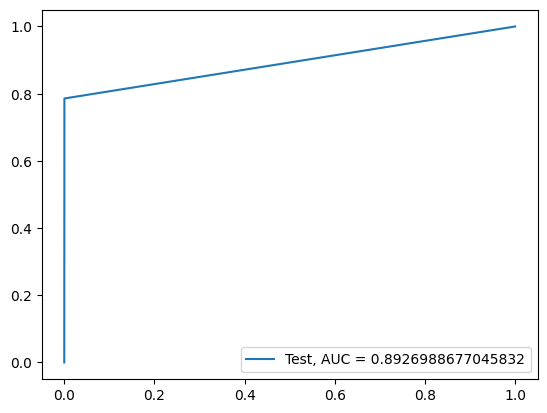

entropy criterion score: 0.9991222064219378
Confusion Matrix:


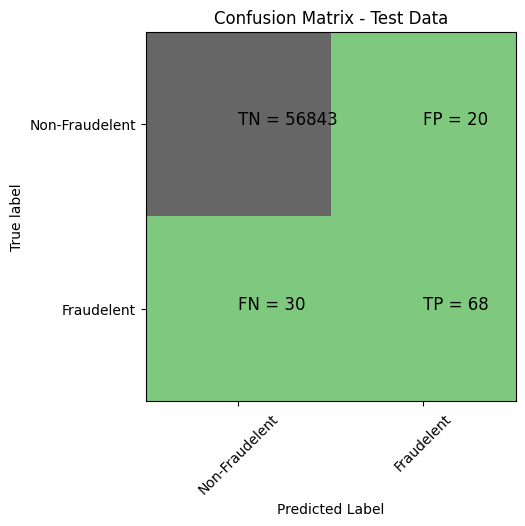

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.77      0.69      0.73        98

    accuracy                           1.00     56961
   macro avg       0.89      0.85      0.87     56961
weighted avg       1.00      1.00      1.00     56961

entropy criterion tree ROC value: 0.8467629142295822
Tree threshold: 1.0
ROC AUC for the test dataset: 84.7%


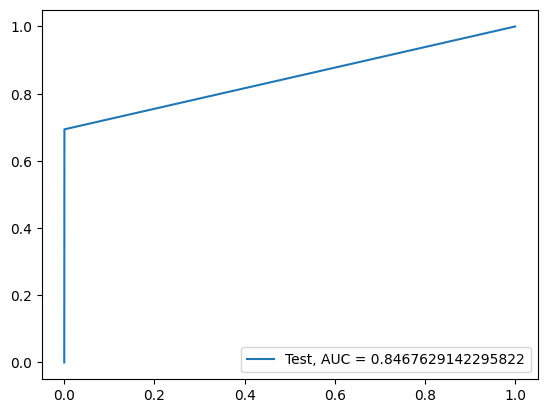

Time Taken by Model: -----29.398350715637207econds-----
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9995611032109689
Confusion Matrix


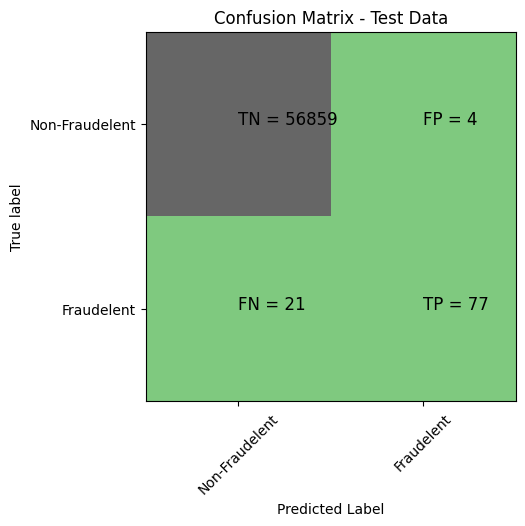

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.95      0.79      0.86        98

    accuracy                           1.00     56961
   macro avg       0.98      0.89      0.93     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest ROC AUC Value: 0.9521035521466382
Random Forest Threshold: 0.01
ROC AUC for the test dataset: 95.2%


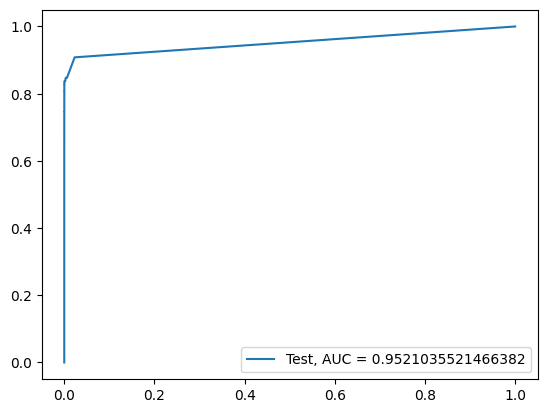

Time Taken by Model: -----205.2055835723877econds-----
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9996137708256526
Confusion Matrix


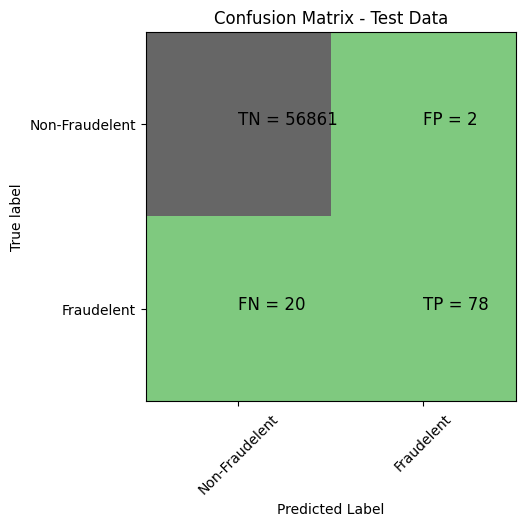

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.80      0.88        98

    accuracy                           1.00     56961
   macro avg       0.99      0.90      0.94     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost ROC AUC Value: 0.9879011027937898
XGBoost Threshold: 6.643653614446521e-05
ROC for the test dataset: 98.8%


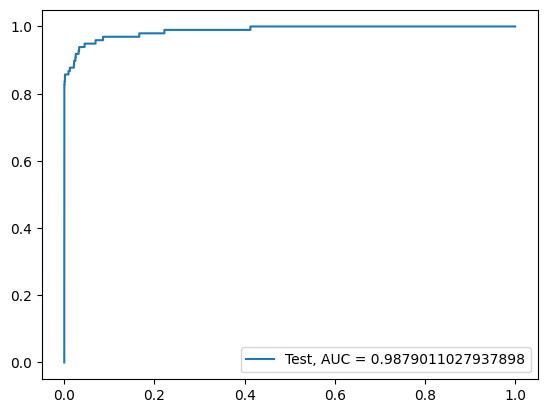

Time Taken by Model: -----1.1110844612121582econds-----
------------------------------------------------------------


In [31]:
# Run logistic Regression with L1 and L2 Regularisation
print("Logistic Regression with L1 and L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv,y_test_cv)
print("Time Taken by Model: -----%seconds-----" % (time.time() - start_time))
print('-'*60)

# Run KNN model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv,y_test_cv)
print("Time Taken by Model: -----%seconds-----" % (time.time() - start_time))
print('-'*60)

# Run Decision Tree Models with 'gini' & 'entropy' criteria
print("Decision Tree Models with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv,y_test_cv)
print("Time Taken by Model: -----%seconds-----" % (time.time() - start_time))
print('-'*60)

# Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv,y_test_cv)
print("Time Taken by Model: -----%seconds-----" % (time.time() - start_time))
print('-'*60)

# Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv,y_test_cv)
print("Time Taken by Model: -----%seconds-----" % (time.time() - start_time))
print('-'*60)

In [32]:
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.998912,0.863672,0.052183
1,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998280,0.528087,0.499371
2,RepeatedKFold Cross Validation,KNN,0.999192,0.862029,0.200000
3,RepeatedKFold Cross Validation,Tree Model with gini criterion,0.999315,0.892699,1.000000
4,RepeatedKFold Cross Validation,Tree Model with entropy criterion,0.999122,0.846763,1.000000
5,RepeatedKFold Cross Validation,Random Forest,0.999561,0.952104,0.010000
6,RepeatedKFold Cross Validation,XGBoost,0.999614,0.987901,0.000066


Perform cross validation with StratifiedKFold

In [33]:
# Lets perform StratifiedKFold and check the results
from sklearn.model_selection import StratifiedKFold
rkf = RepeatedKFold(n_splits=5,random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
  print("Train:", train_index, "TEST:",test_index)
  X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
  y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

Train: [     0      4      5 ... 284803 284804 284805] TEST: [     1      2      3 ... 284796 284799 284806]
Train: [     0      1      2 ... 284802 284803 284806] TEST: [    11     12     15 ... 284800 284804 284805]
Train: [     1      2      3 ... 284804 284805 284806] TEST: [     0      5      9 ... 284797 284798 284801]
Train: [     0      1      2 ... 284804 284805 284806] TEST: [    13     14     18 ... 284784 284802 284803]
Train: [     0      1      2 ... 284804 284805 284806] TEST: [     4      6      7 ... 284770 284774 284777]
Train: [     0      2      4 ... 284802 284803 284806] TEST: [     1      3      7 ... 284796 284804 284805]
Train: [     0      1      2 ... 284803 284804 284805] TEST: [     5     12     13 ... 284800 284802 284806]
Train: [     0      1      3 ... 284804 284805 284806] TEST: [     2     15     22 ... 284778 284790 284794]
Train: [     0      1      2 ... 284804 284805 284806] TEST: [     4     11     19 ... 284779 284786 284798]
Train: [     1     

Logistic Regression with L1 and L2 Regularisation
Max AUC ROC for L1:  0.9713744405881138
Max AUC ROC for L2:  0.5685740356561777
Parameters for L1 regularisation:
[[-0.0576342  -0.12778656 -0.18595578  0.06576322 -0.26462994  0.09336725
   0.11760687 -0.02898098 -0.14540495 -0.14693426 -0.03309097  0.00467835
  -0.13396743 -0.22599869  0.01239191 -0.12365283 -0.23654037  0.02773407
   0.01607087  0.23730766  0.08707584 -0.02606898  0.00942943 -0.01055896
  -0.02467379  0.00475838 -0.05847139  0.02493485 -0.00648561 -0.11667004]]
[-2.10071137]
Parameters for L2 regularisation:
[[-1.06484089e-07  9.26620336e-08 -1.84256201e-07  1.29503172e-07
  -8.82919601e-08 -1.78031364e-08 -1.44273296e-07  1.16409437e-08
  -7.14102959e-08 -1.48861829e-07  9.98056910e-08 -1.63184854e-07
   6.42962293e-09 -1.78075108e-07 -2.03121923e-08 -1.19803102e-07
  -1.72126546e-07 -5.55061993e-08  2.74131304e-08  1.04331668e-08
   1.44817572e-08  1.24904087e-09  1.07685972e-08 -6.00560562e-09
  -1.86233272e-09 -4

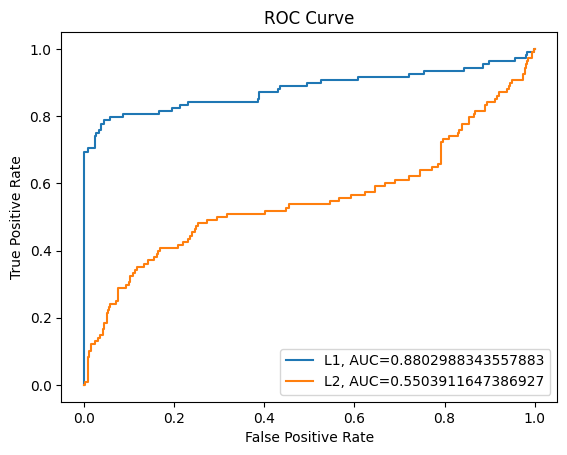

Time Taken by Model: -----99.03628587722778econds-----
------------------------------------------------------------
KNN Model
model score
0.9993943277476892
Confusion Matrix


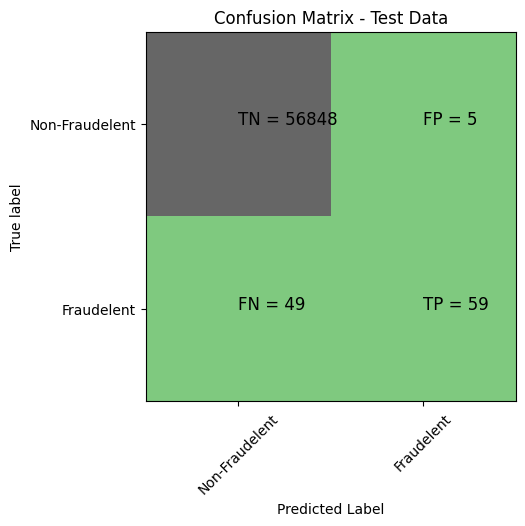

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56853
           1       0.92      0.55      0.69       108

    accuracy                           1.00     56961
   macro avg       0.96      0.77      0.84     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value_value:0.8423351059359713
KNN threshold: 0.2
ROC for the test dataset 84.2%


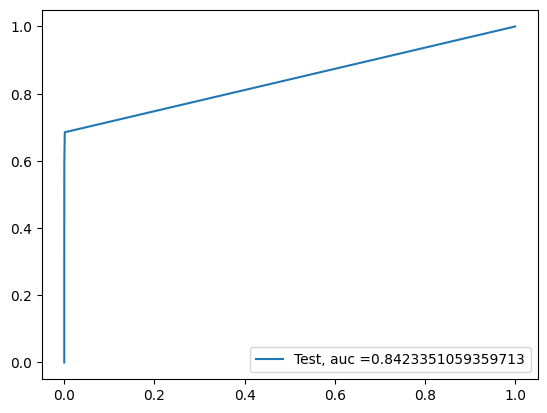

Time Taken by Model: -----22.625599145889282econds-----
------------------------------------------------------------
Decision Tree Models with 'gini' & 'entropy' criteria
gini criterion score: 0.9990519829356929
Confusion Matrix:


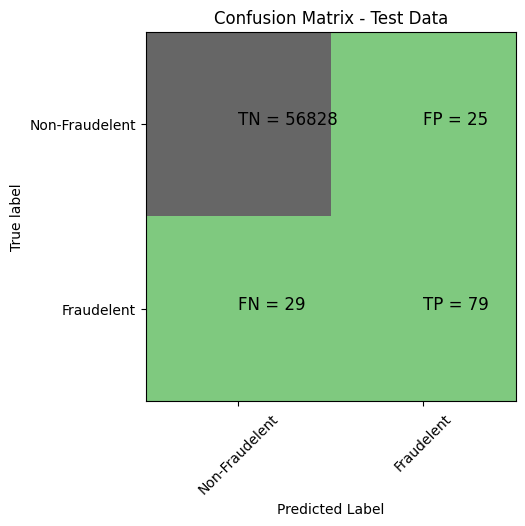

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56853
           1       0.76      0.73      0.75       108

    accuracy                           1.00     56961
   macro avg       0.88      0.87      0.87     56961
weighted avg       1.00      1.00      1.00     56961

gini criterion tree ROC value: 0.8655208754741761
Tree threshold: 1.0
ROC AUC for the test dataset: 86.6%


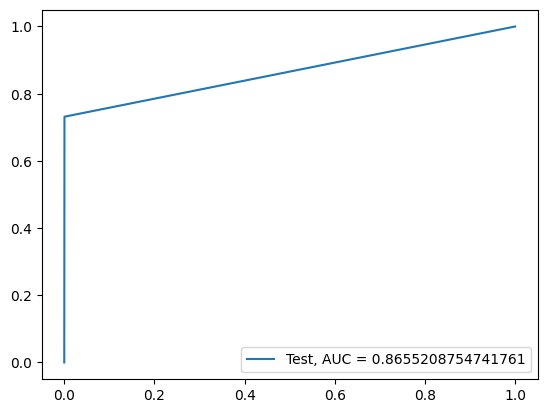

entropy criterion score: 0.9992099857797441
Confusion Matrix:


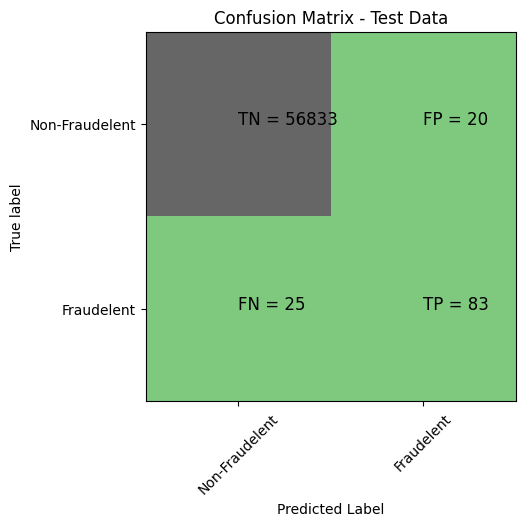

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56853
           1       0.81      0.77      0.79       108

    accuracy                           1.00     56961
   macro avg       0.90      0.88      0.89     56961
weighted avg       1.00      1.00      1.00     56961

entropy criterion tree ROC value: 0.8840833670460077
Tree threshold: 1.0
ROC AUC for the test dataset: 88.4%


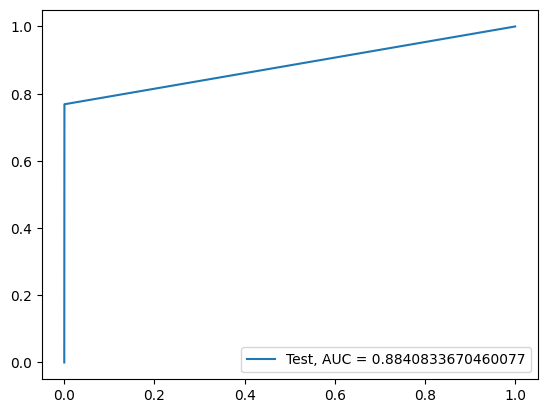

Time Taken by Model: -----29.755677938461304econds-----
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9994557679816014
Confusion Matrix


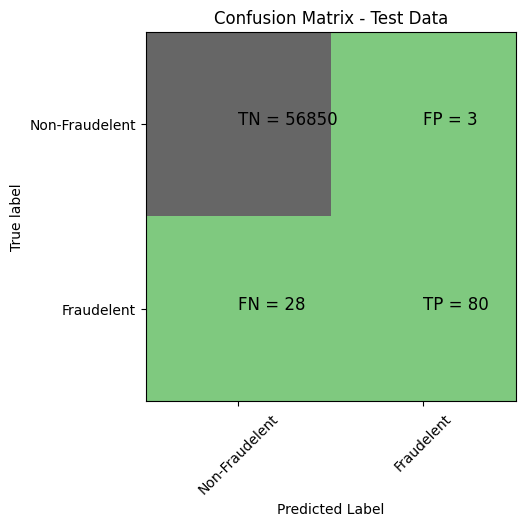

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56853
           1       0.96      0.74      0.84       108

    accuracy                           1.00     56961
   macro avg       0.98      0.87      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest ROC AUC Value: 0.9472995985097371
Random Forest Threshold: 0.01
ROC AUC for the test dataset: 94.7%


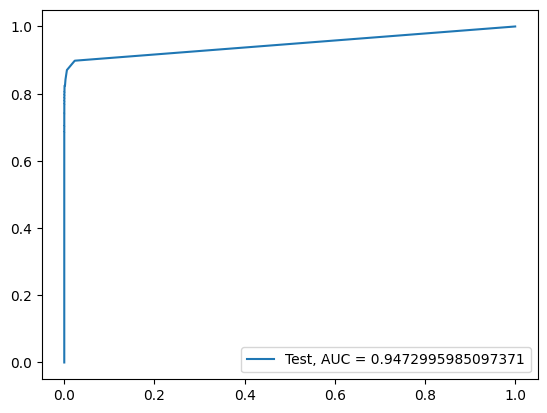

Time Taken by Model: -----217.52582716941833econds-----
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994557679816014
Confusion Matrix


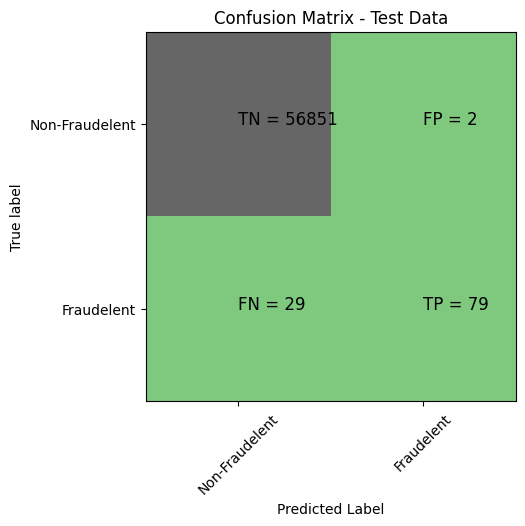

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56853
           1       0.98      0.73      0.84       108

    accuracy                           1.00     56961
   macro avg       0.99      0.87      0.92     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost ROC AUC Value: 0.9823155037259834
XGBoost Threshold: 2.9864651878597215e-05
ROC for the test dataset: 98.2%


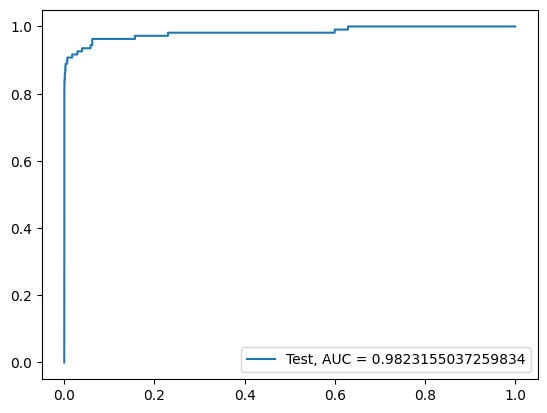

Time Taken by Model: -----1.1963446140289307econds-----
------------------------------------------------------------


In [34]:
# Run logistic Regression with L1 and L2 Regularisation
print("Logistic Regression with L1 and L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv,y_test_SKF_cv)
print("Time Taken by Model: -----%seconds-----" % (time.time() - start_time))
print('-'*60)

# Run KNN model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv,y_test_SKF_cv)
print("Time Taken by Model: -----%seconds-----" % (time.time() - start_time))
print('-'*60)

# Run Decision Tree Models with 'gini' & 'entropy' criteria
print("Decision Tree Models with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv,y_test_SKF_cv)
print("Time Taken by Model: -----%seconds-----" % (time.time() - start_time))
print('-'*60)

# Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"RepeatedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv,y_test_SKF_cv)
print("Time Taken by Model: -----%seconds-----" % (time.time() - start_time))
print('-'*60)

# Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv,y_test_SKF_cv)
print("Time Taken by Model: -----%seconds-----" % (time.time() - start_time))
print('-'*60)


In [35]:
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.998912,0.863672,0.052183
1,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998280,0.528087,0.499371
2,RepeatedKFold Cross Validation,KNN,0.999192,0.862029,0.200000
3,RepeatedKFold Cross Validation,Tree Model with gini criterion,0.999315,0.892699,1.000000
4,RepeatedKFold Cross Validation,Tree Model with entropy criterion,0.999122,0.846763,1.000000
5,RepeatedKFold Cross Validation,Random Forest,0.999561,0.952104,0.010000
6,RepeatedKFold Cross Validation,XGBoost,0.999614,0.987901,0.000066
7,StratifiedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.998964,0.880299,0.042797
8,StratifiedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998104,0.550391,0.499191
9,StratifiedKFold Cross Validation,KNN,0.999052,0.842335,0.200000


In this context XGBoost with RepeatedKFold performs best with ROC-VALUE of 0.99 and optimal threshold of 0.000063

# Model building with balancing classes

Perform class balancing with:

*   Random Oversampling
*   SMOTE
*   ADASYN



# Model building with balancing classes
Perform class balancing with:


*   Random Oversampling
*   SMOTE
*   ADASYN



## Oversampling with RandomOverSampler with StratifiedKFold Cross Validation


* We will use Random Oversampling method to handle the class imbalance




In [37]:
pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.7 MB/s eta 0:00:00


In [38]:
# Creating the dataset with RandomOverSampler and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
cols = X.columns

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]

    ROS = RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over = ROS.fit_resample(X_train, y_train)

X_over = pd.DataFrame(data=X_over, columns=cols)

Logistic Regression with L1 and L2 Regularisation
Max AUC ROC for L1:  0.5
Max AUC ROC for L2:  0.5
Parameters for L1 regularisation:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
Parameters for L2 regularisation:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
Accuracy of Logistic model with L1 regularisation: 0.9982795245869981
Accuracy of Logistic model with L2 regularisation: 0.9982795245869981
L1 ROC AUC Value: 0.5
L1 Threshold: inf
ROC AUC for L1 regularisation: 50.0%
L2 ROC AUC Value: 0.5
L2 Threshold: inf
ROC AUC for L2 regularisation: 50.0%


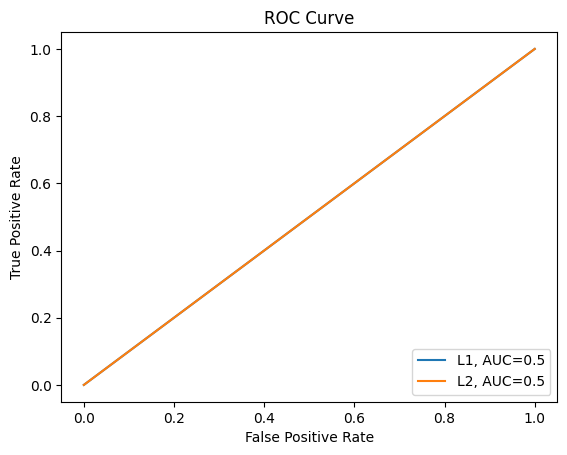

Time Taken by Model: ---- 96.68088245391846 seconds ----
------------------------------------------------------------
KNN Model
model score
0.9997537942071294
Confusion Matrix


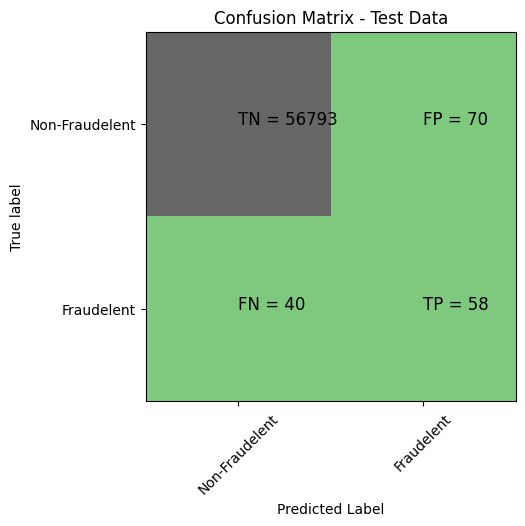

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.45      0.59      0.51        98

    accuracy                           1.00     56961
   macro avg       0.73      0.80      0.76     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value_value:0.805604465728046
KNN threshold: 0.2
ROC for the test dataset 80.6%


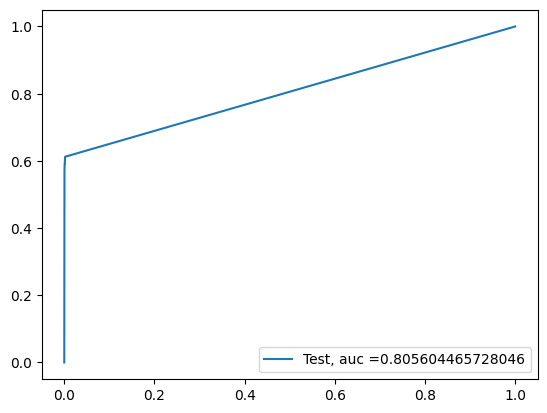

Time Taken by Model: ---- 37.71174383163452 seconds ----
------------------------------------------------------------
Decision Tree Models with 'gini' & 'entropy' criteria
gini criterion score: 0.9990519829356929
Confusion Matrix:


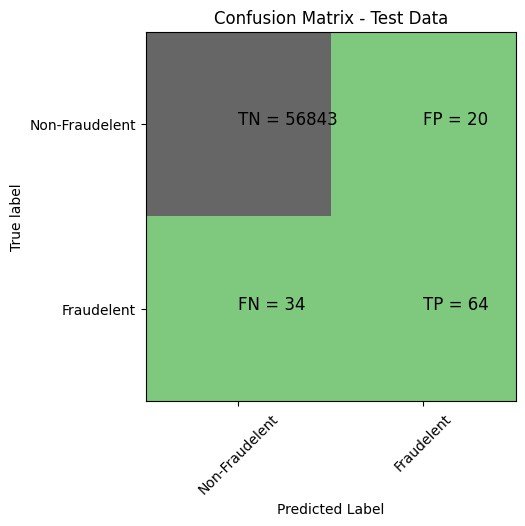

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.76      0.65      0.70        98

    accuracy                           1.00     56961
   macro avg       0.88      0.83      0.85     56961
weighted avg       1.00      1.00      1.00     56961

gini criterion tree ROC value: 0.826354750964276
Tree threshold: 1.0
ROC AUC for the test dataset: 82.6%


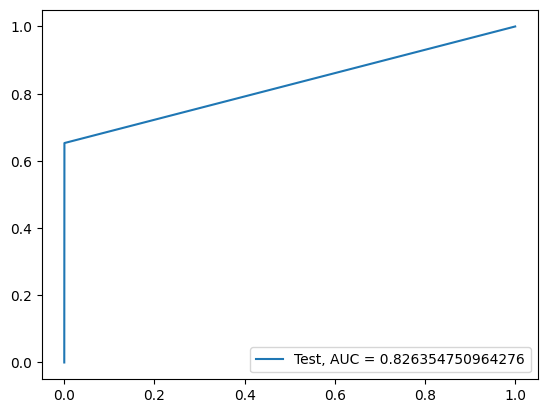

entropy criterion score: 0.9991748740366215
Confusion Matrix:


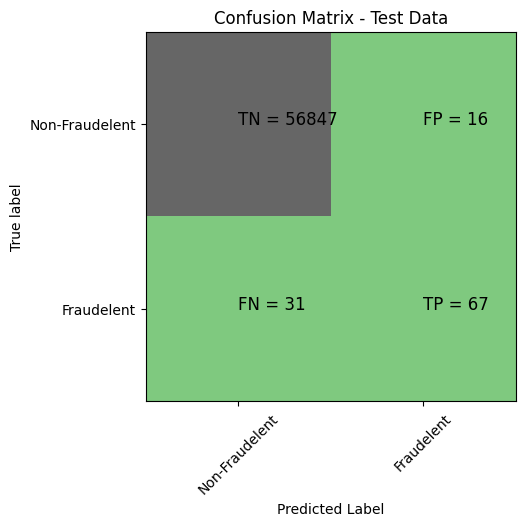

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.81      0.68      0.74        98

    accuracy                           1.00     56961
   macro avg       0.90      0.84      0.87     56961
weighted avg       1.00      1.00      1.00     56961

entropy criterion tree ROC value: 0.84169604566938
Tree threshold: 1.0
ROC AUC for the test dataset: 84.2%


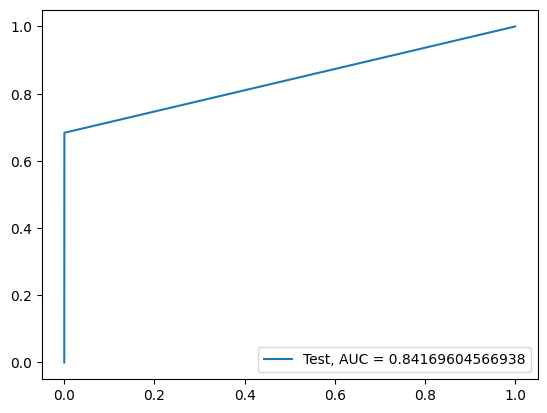

Time Taken by Model: -----21.902013301849365 seconds-----
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.999490879724724
Confusion Matrix


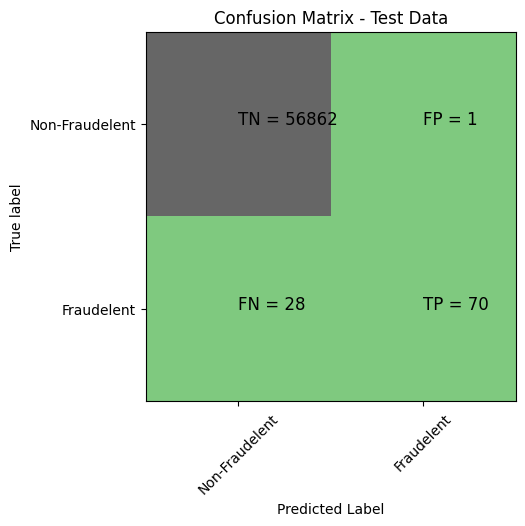

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.71      0.83        98

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.91     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest ROC AUC Value: 0.9454524964585486
Random Forest Threshold: 0.01
ROC AUC for the test dataset: 94.5%


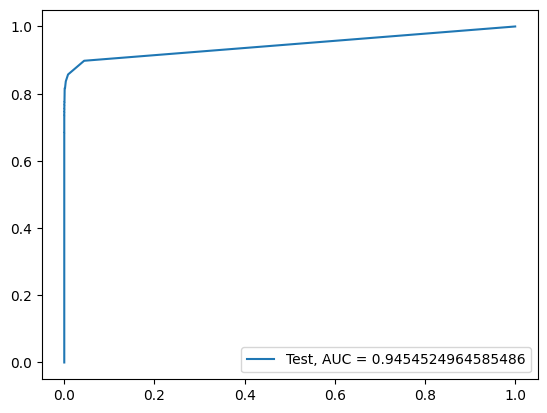

Time Taken by Model: -----157.46975779533386 seconds-----
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994382121100402
Confusion Matrix


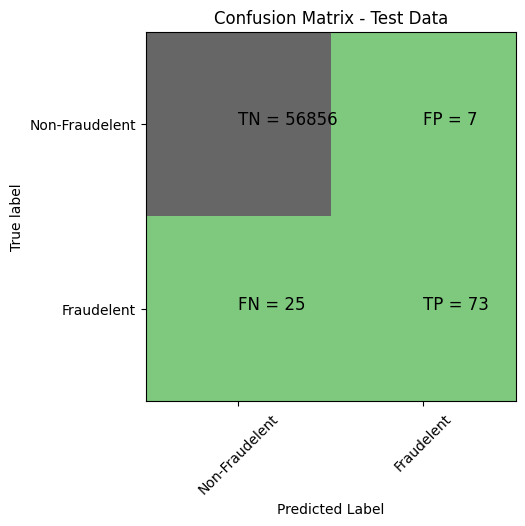

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.91      0.74      0.82        98

    accuracy                           1.00     56961
   macro avg       0.96      0.87      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost ROC AUC Value: 0.9761388543247699
XGBoost Threshold: 0.0001403047499479726
ROC for the test dataset: 97.6%


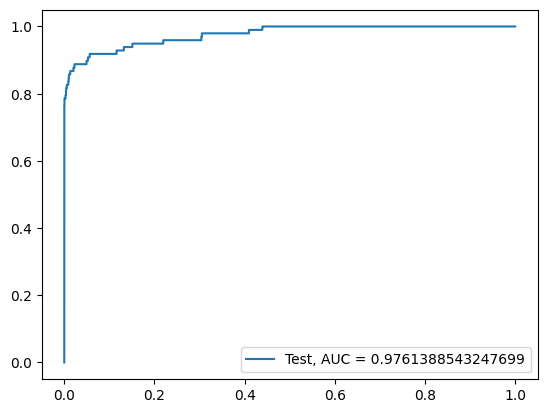

Time Taken by Model: -----1.365081787109375 seconds-----
------------------------------------------------------------


In [39]:
# Running Logistic Regression with L1 and L2 Regularisation
Data_Imbalance_Handling = "Random OverSampling with StratifiedKFold CV"
print("Logistic Regression with L1 and L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
print("Time Taken by Model: ---- %s seconds ----" % (time.time() - start_time))
print('-' * 60)

# Running KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
print("Time Taken by Model: ---- %s seconds ----" % (time.time() - start_time))
print('-' * 60)

# Run Decision Tree Models with 'gini' & 'entropy' criteria
print("Decision Tree Models with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
print("Time Taken by Model: -----%s seconds-----" % (time.time() - start_time))
print('-'*60)

# Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
print("Time Taken by Model: -----%s seconds-----" % (time.time() - start_time))
print('-'*60)

# Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
print("Time Taken by Model: -----%s seconds-----" % (time.time() - start_time))
print('-'*60)



In [40]:
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.998912,0.863672,0.052183
1,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998280,0.528087,0.499371
2,RepeatedKFold Cross Validation,KNN,0.999192,0.862029,0.200000
3,RepeatedKFold Cross Validation,Tree Model with gini criterion,0.999315,0.892699,1.000000
4,RepeatedKFold Cross Validation,Tree Model with entropy criterion,0.999122,0.846763,1.000000
5,RepeatedKFold Cross Validation,Random Forest,0.999561,0.952104,0.010000
6,RepeatedKFold Cross Validation,XGBoost,0.999614,0.987901,0.000066
7,StratifiedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.998964,0.880299,0.042797
8,StratifiedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998104,0.550391,0.499191
9,StratifiedKFold Cross Validation,KNN,0.999052,0.842335,0.200000


# Oversampling with SMOTE Oversampling

*   We will use SMOTE Oversampling method to handle the class imbalance




In [41]:
# Creating the dataset with Smote and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]

    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_Smote, y_train_Smote = SMOTE.fit_resample(X_train, y_train)

X_train_Smote = pd.DataFrame(data=X_train_Smote, columns=cols)

Logistic Regression with L1 and L2 Regularisation
Max AUC ROC for L1:  0.5
Max AUC ROC for L2:  0.5
Parameters for L1 regularisation:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
Parameters for L2 regularisation:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
Accuracy of Logistic model with L1 regularisation: 0.9982795245869981
Accuracy of Logistic model with L2 regularisation: 0.9982795245869981
L1 ROC AUC Value: 0.5
L1 Threshold: inf
ROC AUC for L1 regularisation: 50.0%
L2 ROC AUC Value: 0.5
L2 Threshold: inf
ROC AUC for L2 regularisation: 50.0%


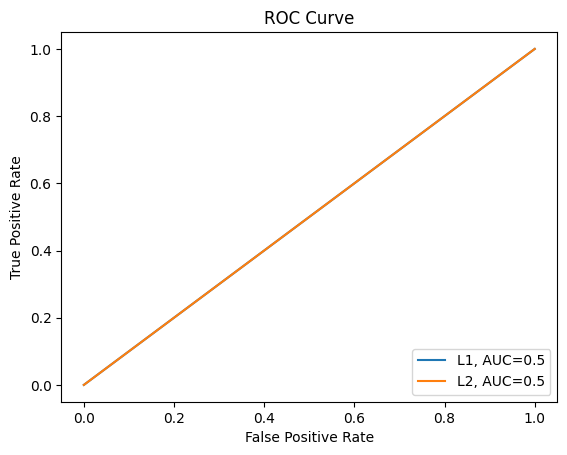

Time Taken by Model: ---- 112.98345875740051 seconds ----
------------------------------------------------------------
KNN Model
model score
0.9989294444542145
Confusion Matrix


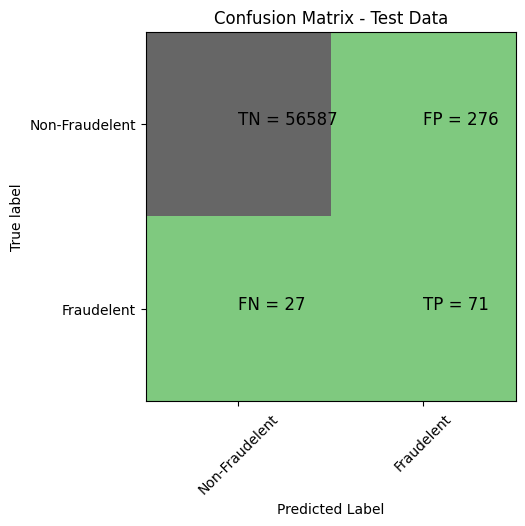

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.20      0.72      0.32        98

    accuracy                           0.99     56961
   macro avg       0.60      0.86      0.66     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc_value_value:0.8602674455287628
KNN threshold: 0.6
ROC for the test dataset 86.0%


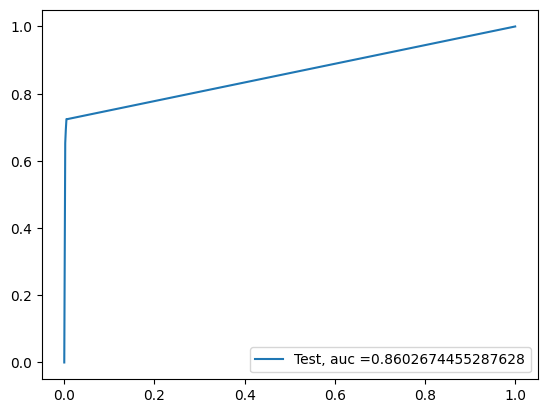

Time Taken by Model: ---- 57.06144404411316 seconds ----
------------------------------------------------------------
Decision Tree Models with 'gini' & 'entropy' criteria
gini criterion score: 0.9977528484401608
Confusion Matrix:


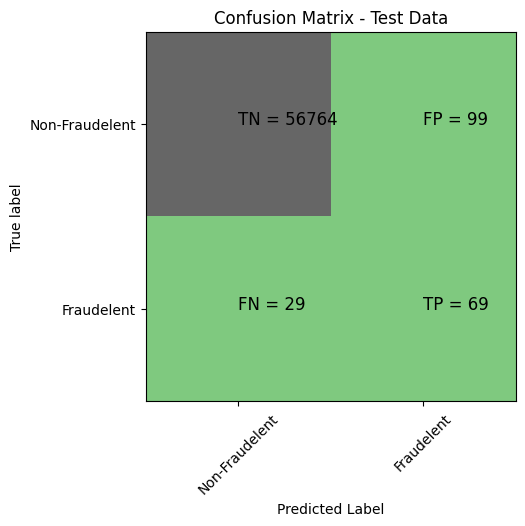

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.41      0.70      0.52        98

    accuracy                           1.00     56961
   macro avg       0.71      0.85      0.76     56961
weighted avg       1.00      1.00      1.00     56961

gini criterion tree ROC value: 0.8511703029874526
Tree threshold: 1.0
ROC AUC for the test dataset: 85.1%


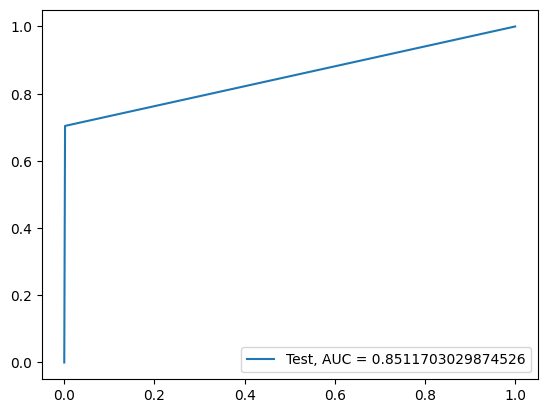

entropy criterion score: 0.9969803900914661
Confusion Matrix:


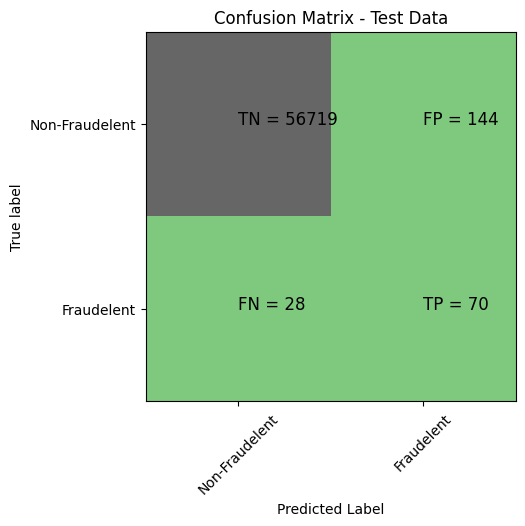

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.33      0.71      0.45        98

    accuracy                           1.00     56961
   macro avg       0.66      0.86      0.72     56961
weighted avg       1.00      1.00      1.00     56961

entropy criterion tree ROC value: 0.8558766559223799
Tree threshold: 1.0
ROC AUC for the test dataset: 85.6%


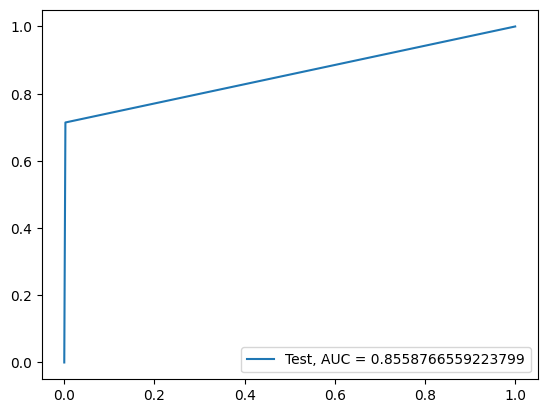

Time Taken by Model: -----71.96790051460266 seconds-----
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.999490879724724
Confusion Matrix


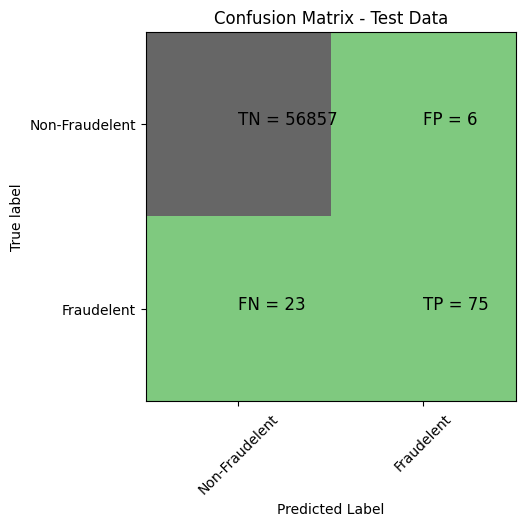

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.93      0.77      0.84        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest ROC AUC Value: 0.9614705879186172
Random Forest Threshold: 0.05
ROC AUC for the test dataset: 96.1%


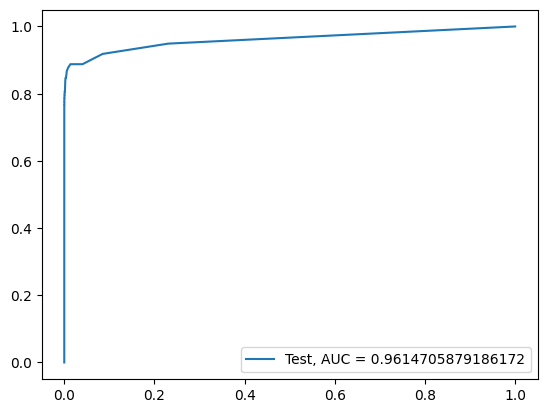

Time Taken by Model: -----357.3499946594238 seconds-----
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994031003669177
Confusion Matrix


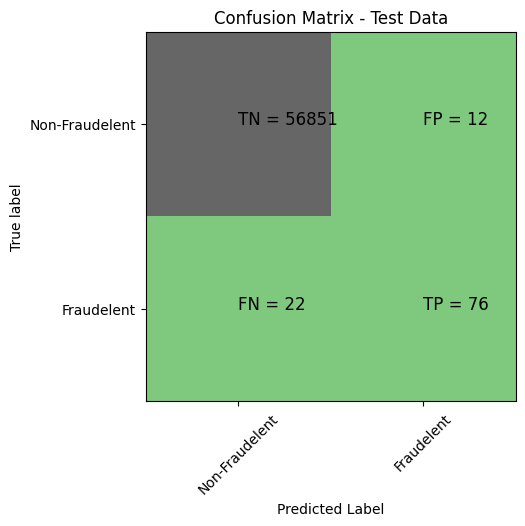

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.86      0.78      0.82        98

    accuracy                           1.00     56961
   macro avg       0.93      0.89      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost ROC AUC Value: 0.9704734293344512
XGBoost Threshold: 0.000144163059303537
ROC for the test dataset: 97.0%


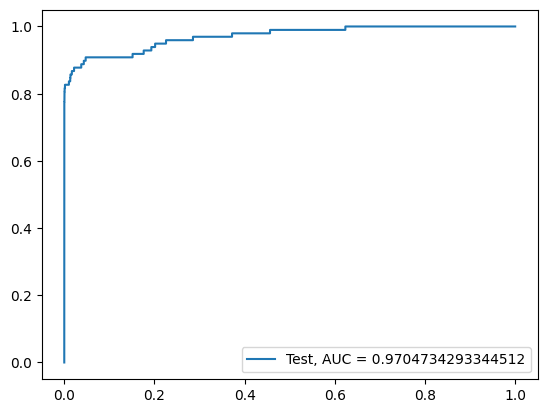

Time Taken by Model: -----1.578568458557129 seconds-----
------------------------------------------------------------


In [42]:
# Running Logistic Regression with L1 and L2 Regularisation
Data_Imbalance_Handling = "SMOTE with StratifiedKFold CV"
print("Logistic Regression with L1 and L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handling,  X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Taken by Model: ---- %s seconds ----" % (time.time() - start_time))
print('-' * 60)

# Running KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Taken by Model: ---- %s seconds ----" % (time.time() - start_time))
print('-' * 60)

# Run Decision Tree Models with 'gini' & 'entropy' criteria
print("Decision Tree Models with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Taken by Model: -----%s seconds-----" % (time.time() - start_time))
print('-'*60)

# Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handling,  X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Taken by Model: -----%s seconds-----" % (time.time() - start_time))
print('-'*60)

# Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handling,  X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Taken by Model: -----%s seconds-----" % (time.time() - start_time))
print('-'*60)



# Oversampling with ADASYN Oversampling

*   We will use ADASYN oversampling method to handle the class imbalance




In [43]:
# Creating the dataset with ADASYN and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]

    ADASYN = over_sampling.ADASYN(random_state=0)
    X_train_ADASYN, y_train_ADASYN = ADASYN.fit_resample(X_train, y_train)

X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN, columns=cols)

Logistic Regression with L1 and L2 Regularisation
Max AUC ROC for L1:  0.5
Max AUC ROC for L2:  0.6091741619819793
Parameters for L1 regularisation:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
Parameters for L2 regularisation:
[[-2.01595537e-05  1.72317688e-05 -3.64909067e-05  3.39290450e-05
  -1.46234036e-05 -8.46815505e-06 -2.20942850e-05  3.85352425e-07
  -1.34235180e-05 -3.75798463e-05  2.79794199e-05 -4.50836936e-05
  -2.12360047e-06 -5.56215470e-05  1.17193947e-06 -2.74594763e-05
  -4.06813002e-05 -1.20266028e-05  4.49719240e-06  1.33830143e-06
   6.32715682e-06  5.58244410e-07 -2.26605364e-06 -8.54000002e-07
  -5.65808664e-07 -2.03181861e-07  2.36428895e-06  7.75570254e-07
   1.29444742e-03 -2.92744751e-05]]
[-9.9952445e-07]
Accuracy of Logistic model with L1 regularisation: 0.9982795245869981
Accuracy of Logistic model with L2 regularisation: 0.011200646056073453
L1 ROC AUC Value: 0.5
L1 Threshold: inf
ROC AUC for L1 regu

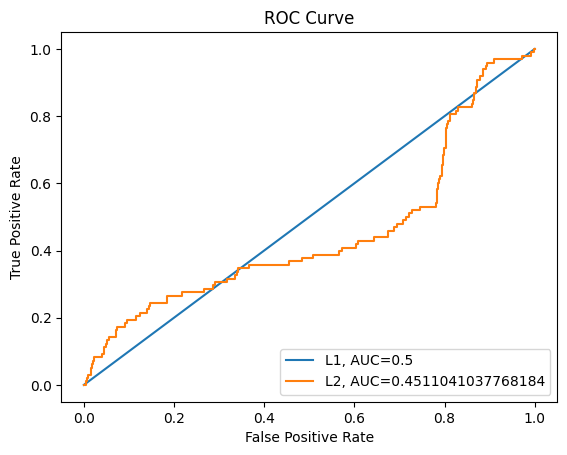

Time Taken by Model: ---- 116.63128614425659 seconds ----
------------------------------------------------------------
KNN Model
model score
0.9988129467936374
Confusion Matrix


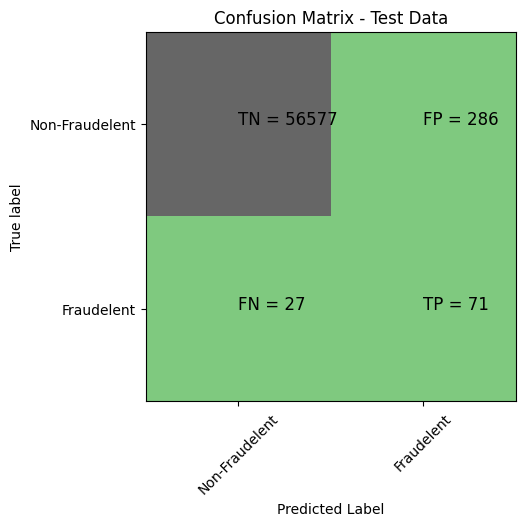

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.20      0.72      0.31        98

    accuracy                           0.99     56961
   macro avg       0.60      0.86      0.65     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc_value_value:0.8601937811862167
KNN threshold: 0.6
ROC for the test dataset 86.0%


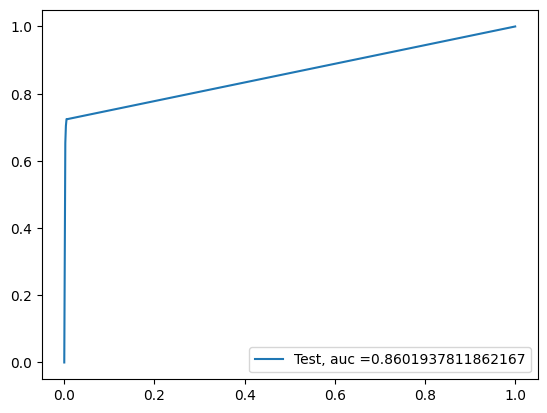

Time Taken by Model: ---- 56.36149001121521 seconds ----
------------------------------------------------------------
Decision Tree Models with 'gini' & 'entropy' criteria
gini criterion score: 0.9979459630273345
Confusion Matrix:


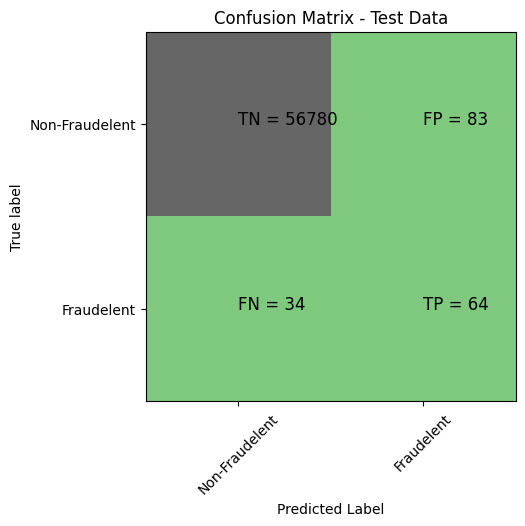

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.44      0.65      0.52        98

    accuracy                           1.00     56961
   macro avg       0.72      0.83      0.76     56961
weighted avg       1.00      1.00      1.00     56961

gini criterion tree ROC value: 0.8258007879303172
Tree threshold: 1.0
ROC AUC for the test dataset: 82.6%


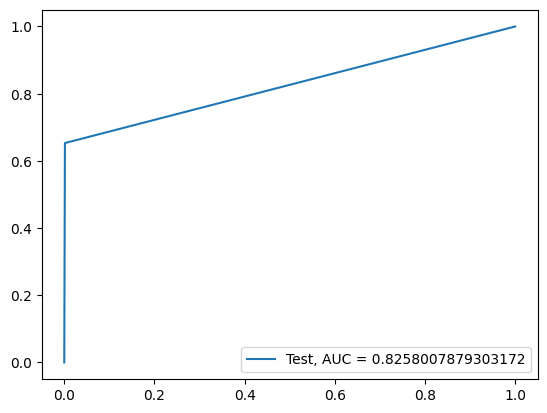

entropy criterion score: 0.9954179175225154
Confusion Matrix:


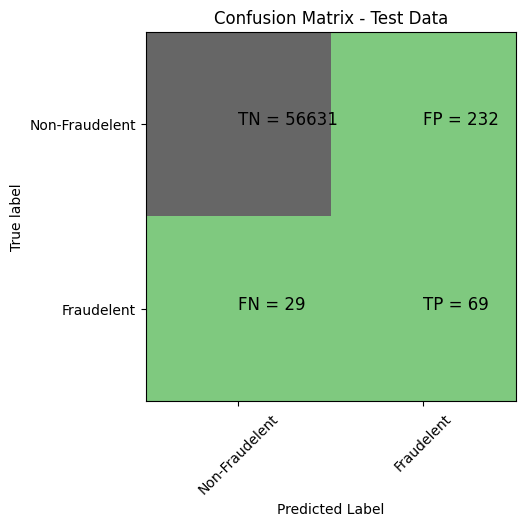

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.23      0.70      0.35        98

    accuracy                           1.00     56961
   macro avg       0.61      0.85      0.67     56961
weighted avg       1.00      1.00      1.00     56961

entropy criterion tree ROC value: 0.8500008254713172
Tree threshold: 1.0
ROC AUC for the test dataset: 85.0%


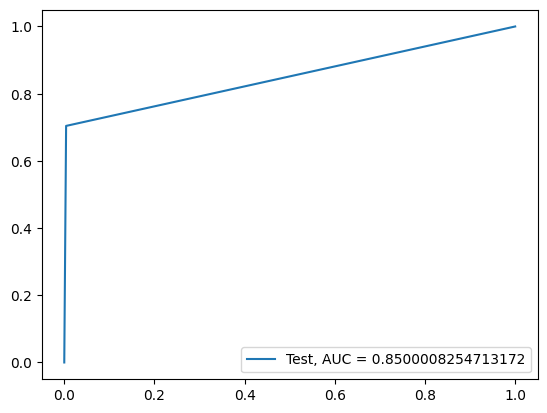

Time Taken by Model: -----72.39158058166504 seconds-----
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9995259914678464
Confusion Matrix


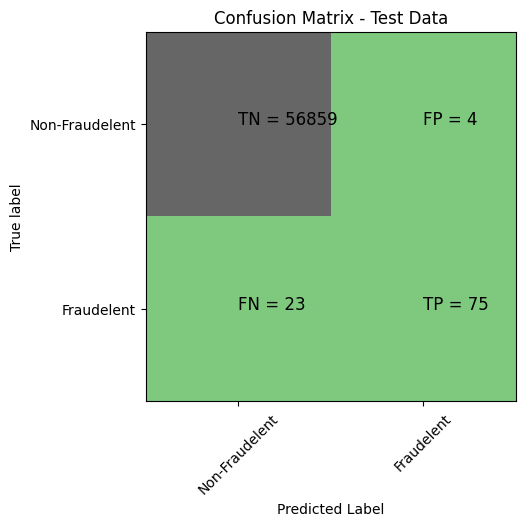

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.95      0.77      0.85        98

    accuracy                           1.00     56961
   macro avg       0.97      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest ROC AUC Value: 0.9632269575962563
Random Forest Threshold: 0.03
ROC AUC for the test dataset: 96.3%


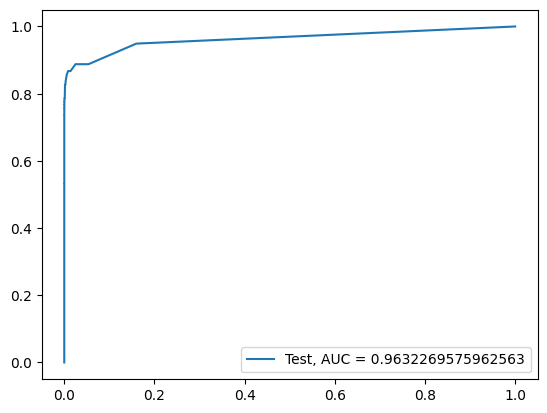

Time Taken by Model: -----376.88518714904785 seconds-----
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.999350432752234
Confusion Matrix


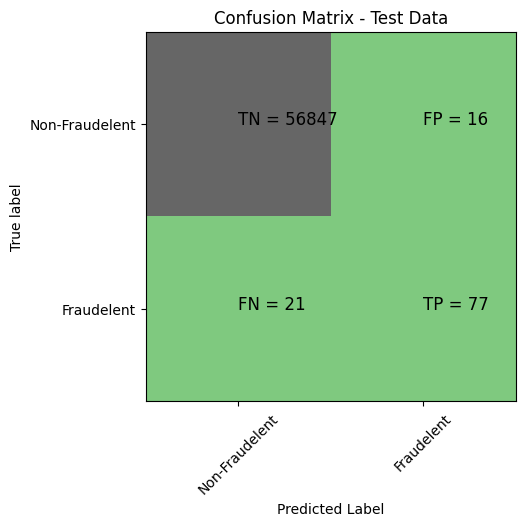

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.83      0.79      0.81        98

    accuracy                           1.00     56961
   macro avg       0.91      0.89      0.90     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost ROC AUC Value: 0.9696561230052754
XGBoost Threshold: 0.00012316476204432547
ROC for the test dataset: 97.0%


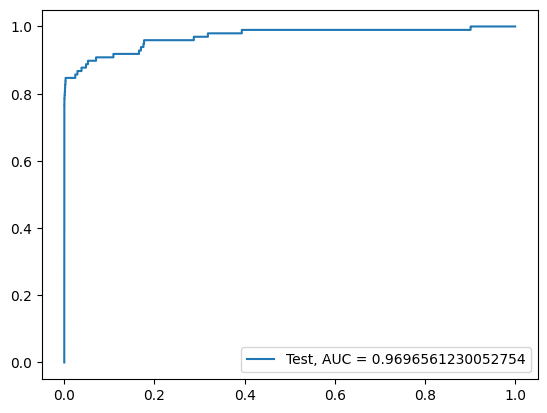

Time Taken by Model: -----1.4774234294891357 seconds-----
------------------------------------------------------------


In [44]:
# Running Logistic Regression with L1 and L2 Regularisation
Data_Imbalance_Handling = "ADASYN with StratifiedKFold CV"
print("Logistic Regression with L1 and L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handling,  X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: ---- %s seconds ----" % (time.time() - start_time))
print('-' * 60)

# Running KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handling,  X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: ---- %s seconds ----" % (time.time() - start_time))
print('-' * 60)

# Run Decision Tree Models with 'gini' & 'entropy' criteria
print("Decision Tree Models with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handling,  X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: -----%s seconds-----" % (time.time() - start_time))
print('-'*60)

# Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handling,  X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: -----%s seconds-----" % (time.time() - start_time))
print('-'*60)

# Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handling,  X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: -----%s seconds-----" % (time.time() - start_time))
print('-'*60)



In [46]:
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.998912,0.863672,0.052183
1,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998280,0.528087,0.499371
2,RepeatedKFold Cross Validation,KNN,0.999192,0.862029,0.200000
3,RepeatedKFold Cross Validation,Tree Model with gini criterion,0.999315,0.892699,1.000000
4,RepeatedKFold Cross Validation,Tree Model with entropy criterion,0.999122,0.846763,1.000000
5,RepeatedKFold Cross Validation,Random Forest,0.999561,0.952104,0.010000
6,RepeatedKFold Cross Validation,XGBoost,0.999614,0.987901,0.000066
7,StratifiedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.998964,0.880299,0.042797
8,StratifiedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998104,0.550391,0.499191
9,StratifiedKFold Cross Validation,KNN,0.999052,0.842335,0.200000


# Overall conclusion after running the models on the oversampled data

Looking at above results it seems XGBOOST model with Randomoversampling with stratifiedKFold CV has provided the best results under the result of all oversampling tecniques. So we will try to tune the hyperparameters of the model to get best results

Hyperparameter Tuning

In [49]:
# Performing Hyperparameter tuning
from xgboost import XGBRFClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
param_test = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'n_estimators':range(60,130,150),
    'learning_rate':[0.05,0.1,0.125,0.15,0.2],
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(7,10)],
    'colsample_bytree':[i/10.0 for i in range(7,10)]

}

gsearch1 = RandomizedSearchCV(estimator=XGBClassifier(base_score=0.5,booster='gbtree',colsample_bylevel=1,
                                                      colsample_bynode=1,max_delta_step=0,
                                                      missing=None, n_jobs=-1,
                                                      nthread=None,objective='binary:logistic',random_state=42,
                                                      reg_alpha=0, reg_lambda=1,scale_pos_weight=1, seed=None,
                                                      silent=None, verbosity=1),
                                                      param_distributions= param_test, n_iter=5, scoring='roc_auc',n_jobs=-1, cv=5)
gsearch1.fit(X_over,y_over)
gsearch1.cv_results_,gsearch1.best_params_,gsearch1.best_score_

({'mean_fit_time': array([4.58595281, 4.51410456, 3.27945261, 4.5883956 , 4.9082068 ]),
  'std_fit_time': array([0.09287035, 0.07690068, 0.22445816, 0.27589943, 0.08432841]),
  'mean_score_time': array([0.0125772 , 0.01235147, 0.01414657, 0.01259513, 0.01183553]),
  'std_score_time': array([0.00044736, 0.00032686, 0.00082798, 0.00064665, 0.00040781]),
  'param_subsample': masked_array(data=[0.8, 0.9, 0.8, 0.7, 0.7],
               mask=[False, False, False, False, False],
         fill_value=1e+20),
  'param_n_estimators': masked_array(data=[60, 60, 60, 60, 60],
               mask=[False, False, False, False, False],
         fill_value=999999),
  'param_min_child_weight': masked_array(data=[5, 5, 3, 3, 5],
               mask=[False, False, False, False, False],
         fill_value=999999),
  'param_max_depth': masked_array(data=[7, 7, 3, 9, 9],
               mask=[False, False, False, False, False],
         fill_value=999999),
  'param_learning_rate': masked_array(data=[0.1, 0.15,

In [51]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

# Create XGBoost model with selected hyperparameters
clf = XGBClassifier(
    base_score=0.5,
    booster='gbtree',
    colsample_bylevel=1,
    colsample_bynode=1,
    colsample_bytree=0.7,
    gamma=0.2,
    learning_rate=0.125,
    max_delta_step=0,
    max_depth=7,
    min_child_weight=5,
    n_estimators=60,
    n_jobs=1,
    objective='binary:logistic',
    random_state=42,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    subsample=0.8,
    verbosity=1
)

# Fit the model on the training dataset
clf.fit(X_over, y_over)

# Evaluate the model
XGB_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {:.2f}'.format(XGB_test_score))

# Predict probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
XGB_roc_value = roc_auc_score(y_test, XGB_probs)
print("XGBoost ROC AUC Score: {:.2f}".format(XGB_roc_value))

# Calculate FPR and TPR for threshold calculation
fpr, tpr, thresholds = roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr - fpr)]
print("Optimal XGBoost Threshold: {:.2f}".format(threshold))


Model Accuracy: 1.00
XGBoost ROC AUC Score: 0.98
Optimal XGBoost Threshold: 0.02


# Print the important features of the best model to understand the dataset

In [53]:
import numpy as np

# Get feature importances from the classifier
importances = clf.feature_importances_

# Get the indices of the top three features
top_indices = np.argsort(importances)[-3:][::-1]  # Sort and get the last three indices

# Print the top three feature importances along with their indices
for rank, idx in enumerate(top_indices, start=1):
    print(f'Top {rank} var (index {idx}): {importances[idx]:.4f}')



Top 1 var (index 13): 0.5046
Top 2 var (index 9): 0.1037
Top 3 var (index 3): 0.0376


In [54]:
#calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)
print("XGboost roc_value:{0}".format(XGB_roc_value))
fpr,tpr,thresholds = metrics.roc_curve(y_test,XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

XGboost roc_value:0.9829520433465755
XGBoost threshold: 0.015807652845978737


# Conclusion
In the oversample cases, of all the models we built, we found that XGBOOST model withRandom Oversampling with StratifiedKFold cv gave us the best accuracy and ROC on oversampled data.
post training we performed hyperparameter tuning and got the below metrices:

XGboost roc_value:0.9829520433465755 ,  XGBoost threshold: 0.015807652845978737
